In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *
from rank_centrality import *
import seaborn as sns

random_s = 10
random.seed(random_s)

In [2]:
with open('./../data/QuickGO-annotations-TFs.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../data/grn_expression.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes))

In [3]:
treatments = ['Anp', 'AMn', 'AMp', 'AMnp']
colors = {'Anp':'#0088ff', 'AMn':'#ff6f00', 'AMp':'#00e883', 'AMnp':'#ffbf00'}

def rank_for_plot(df, y='betweenness_centrality', rank=5):
    '''return the top ranked nodes and group number of nodes into interval of 50'''
    lst = []
    df['plotnodes'] = np.array(round(df['nodes']/50)*50, dtype=int)
    df = df[df['plotnodes']>0]
    df = df.sort_values(by=[y], ascending=False)
    for _, b in df.groupby(['nodes', 'run'], as_index=False):
        lst.append(b[:rank])
    drank = pd.concat(lst)
    return df, drank

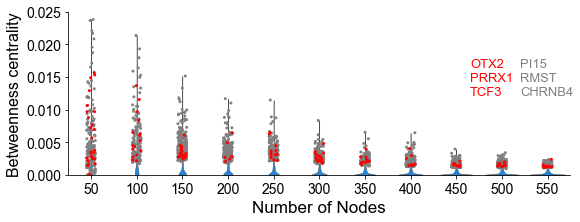

In [26]:
# ax_y = 'betweenness_centrality'
ax_y = 'local_betweenness_centrality'
# ax_y = 'outdegree_centrality'
# ax_y = 'local_outdegree_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[0]}.txt', sep='\t'), 
                                y=ax_y, rank=20)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[0]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.8, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.9, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)


plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S4A.svg', pad_inches=0.1, bbox_inches='tight')

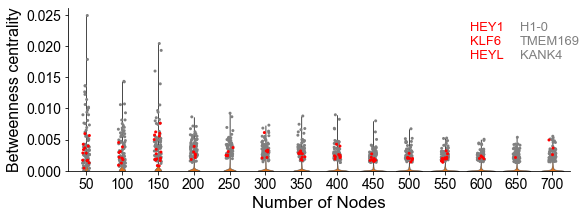

In [27]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[1]}.txt', sep='\t'), 
                                y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[1]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.8, 0.7, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.9, 0.7, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S4B.svg', pad_inches=0.1, bbox_inches='tight')

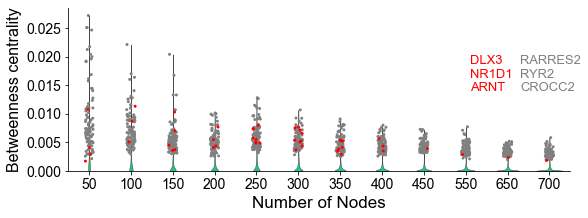

In [28]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[2]}.txt', sep='\t'), 
                                y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[2]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.8, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.9, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S4C.svg', pad_inches=0.1, bbox_inches='tight')

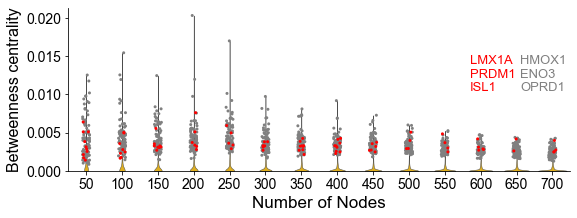

In [29]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[3]}.txt', sep='\t'), 
                                y=ax_y, rank=10)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[3]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.8, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:3].index
ax.text(0.9, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Betweenness centrality', fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S4D.svg', pad_inches=0.1, bbox_inches='tight')

In [30]:
# select transcription facctors from GRNs
gene_anp = ['CEBPA', 'OTX2', 'TCF3', 'ISL1', 'PRDM1', 'PRRX1']
gene_amn = ['MLXIPL', 'HEY1', 'HEYL', 'ST18', 'LMX1A', 'KLF6']
gene_amp = ['NR1D1', 'DLX3', 'ZHX1', 'ZNF395', 'ZNF510', 'ARNT']
gene_amnp = ['LMX1A', 'PRDM1', 'ISL1', 'KLF7', 'ETV5']
runs = list(np.arange(1,11))
steps = np.linspace(0.2,0.9,71)

In [33]:
# compute centrality rank of selected nodes
treatment = treatments[0]
genelist = gene_anp
lstruns_select = []
lstruns_module = []
runs = list(np.arange(1,11))
for run in runs:
    lstrun_select = []
    lstrun_module = []
    DG = read_directed_grn(f'./../results/GRN/{treatment}_{run}.txt')
    for step in steps:
        DGp = remove_edge(DG, step, component='positive')
        if set(genelist)&set(list(DGp.nodes())):
            modules = louvain_cluster(DGp, random_state=True, random_s=random_s)
            df = compute_grn_centrality(DGp, modules, count=True)
            df['rank_betweenness'] = df['betweenness_centrality'].rank(method='max', ascending=False)
            df['rank_outdegree'] = df['outdegree_centrality'].rank(method='max', ascending=False)
            df['rank_local_betweenness'] = df.groupby('community')['local_betweenness_centrality'].rank(method='max', ascending=False)
            df['rank_local_outdegree'] = df.groupby('community')['local_outdegree_centrality'].rank(method='max', ascending=False)
            df = df.loc[df.index.get_level_values('geneid').isin(genelist)]
            dfmodule = pd.DataFrame.from_dict(modules, orient='index', columns=['community'])
            dfmodule = dfmodule[dfmodule['community'].isin(df['community'].unique())]
            dfmodule = pd.concat([dfmodule], keys=[len(modules)], names=['nodes', 'geneid'])
        lstrun_select.append(df)
        lstrun_module.append(dfmodule)
    lstruns_select.append(pd.concat(lstrun_select))
    lstruns_module.append(pd.concat(lstrun_module))
pd.concat(lstruns_select, keys=runs, names=['run']).to_csv(f'./../results/rank_gene_{treatment}.txt', sep='\t')
pd.concat(lstruns_module, keys=runs, names=['run']).to_csv(f'./../results/rank_community_{treatment}.txt', sep='\t')